<p style="align: center;"><img align=center src="https://mailfit.com/wp-content/uploads/2019/11/lego-5.png"  width=900></p>
<h1 style="text-align: center;"><b>«Домашняя работа»</b></h3>


## Импорт Библиотек

In [97]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import chi2_contingency
from scipy import stats

sns.set_theme()

## Импорт данных

In [2]:
data_path = "https://raw.githubusercontent.com/a-milenkin/mipt_data_science_2021/main/data/people_data_clustering.csv"
data = pd.read_csv(data_path, index_col=0)
print("Размеры датасета", data.shape)
data.head()

Размеры датасета (6000, 9)


,was_married,children,salary,sex,age,profession,home_cost,drive_info,happyness
id,,,,,,,,,
0,1,4.0,4.420530e+07,1,82.0,Engineer,1.003674e+07,NaN,0.727499
1,1,2.0,1.737490e+08,1,32.0,Doctor,1.014051e+07,0.0,0.383234
2,1,6.0,2.489055e+08,1,14.0,Entertainment,1.043318e+07,NaN,0.432142
3,0,1.0,1.268718e+08,0,10.0,Lawyer,1.004299e+07,NaN,0.377987
4,1,9.0,8.596042e+07,1,99.0,Artist,1.021908e+07,NaN,0.657579
5,1,3.0,2.474979e+06,0,21.0,Homemaker,1.001654e+07,1.0,0.326801


<div class="alert alert-info">
<b>Про Датасет</b>
    
Датасет представляет собой информацию по жителям некоторого города.

* `was_married` - Был ли когда-либо женат/замужем
* `children` - Количество детей
* `salary` - Уровень зарплаты
* `sex` - Пол (0 - женщина, 1 - мужчина)
* `age` - Возраст
* `home_cost` - Сумарная стоимость жилья/недвижимости
* `Professon` - Профессия
* `drive_info` - Есть ли водительские права
* `happyness` - уровень счастья по результатам опроса
    
</div>

<div class="alert alert-info">
<b>Задание</b>

Изучить датасет, выполнить задания и проверить некоторые гипотезы, предложенные ниже, используя только визуализацию.

# Чистка датасета
* Есть ли дубли в данных? Если есть - удалите их (drop_duplicates). 
* Найти и удалить/отфильтровать выбросы по признаку `home_cost`. Таких точек около 5

In [3]:
data.duplicated().sum()

0

В датасете нет дубликатов.

In [4]:
data.isnull().sum()

was_married       0
children          0
salary            0
sex               0
age               0
profession        0
home_cost         0
drive_info     2770
happyness         0
dtype: int64

In [5]:
data.dropna(inplace=True)
data.isnull().sum()

was_married    0
children       0
salary         0
sex            0
age            0
profession     0
home_cost      0
drive_info     0
happyness      0
dtype: int64

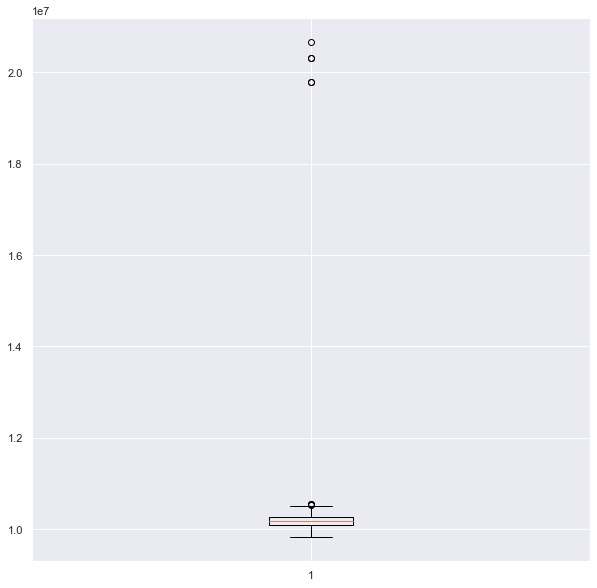

In [6]:
plt.figure(figsize=(10, 10))
plt.boxplot(data['home_cost']);

In [7]:
q25 = data.home_cost.quantile(0.25)
q75 = data.home_cost.quantile(0.75)
iqr = q75 - q25
boundaries = (q25 - 1.5 * iqr, q75 + 1.5 * iqr)
is_outlier = (data.home_cost < boundaries[0]) | (data.home_cost > boundaries[1])
is_outlier.sum()

8

8 выбросов по признаку home_cost

In [8]:
data.loc[data['home_cost'] < boundaries[0]] = np.nan
data.loc[data['home_cost'] > boundaries[1]] = np.nan
data.dropna(inplace=True)

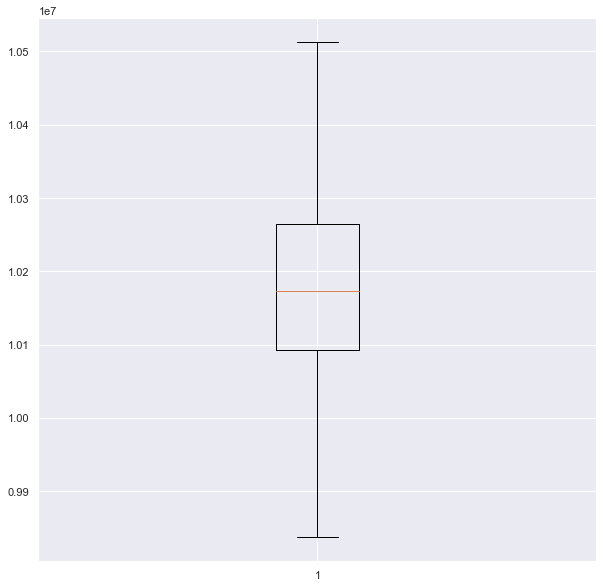

In [9]:
plt.figure(figsize=(10, 10))
plt.boxplot(data['home_cost']);

Выбросы почищены.

# Проверка гипотез

# Изучение датасета 
* Какие признаки численные?
* Какие признаки категориальные?
* Какие признаки имеют нормальное распределение?
* Какие признаки бессмысленные?

<div class="alert alert-info">
    
Перед вами те же гипотезы, которые были в прошлом домашнем задании. Вы уже научились проверять эти утверждения визуально. Теперь же, помимо визуальной состовляющей вам еще нужно применить подходящий статистический критерий, чтобы окончательно доказать или опровергнуть гипотезы на снове этих данных. В качестве уровня значимости принять 5%

* Правда ли женщины в среднем имеют более высокую зарплату, чем мужчины?

In [15]:
# H0 – зарплата выше у женщин
# H1 – зарплата выше у мужчин
# Распределение не нормальное, переменные независимые, берём U-критерий Манна-Уитни

t_value, p_value = stats.mannwhitneyu(data[data['sex'] == 0]['salary'],
                                      data[data['sex'] == 1]['salary'], alternative='less')

alpha = 0.05
if p_value > alpha:
    print('Да, гипотеза верна, у женщин средняя зарплата выше, чем у мужчин')
else:
    print('Нет, гипотеза не верна, у мужчин средняя зарплата выше, чем у женщин')

Нет, гипотеза не верна, у мужчин средняя зарплата выше, чем у женщин


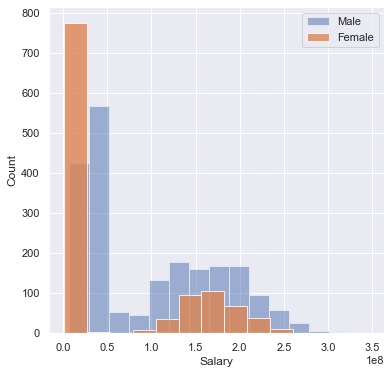

In [89]:
plt.figure(figsize=(6, 6))
plt.hist(data[data['sex'] == 1]['salary'], bins=15, alpha=0.5, label=['Male'])
plt.hist(data[data['sex'] == 0]['salary'], bins=10, alpha=0.8, label=['Female'])

plt.xlabel('Salary')
plt.ylabel('Count')
plt.legend()
plt.grid(True)

plt.show()

* Правда ли, что инженеры (Engineer) зарабатывают в среднем больше, чем люди из сферы развлечений (Entertainment)?

In [29]:
# H0 – зарплата выше у инженеров
# H1 – зарплата выше у работников сферы развлечений
# Распределение нормальное, берём t-тест Стьюдента

t_value, p_value = stats.ttest_ind(data[data['profession'] == 'Engineer']['salary'],
                                   data[data['profession'] == 'Entertainment']['salary'], alternative='less')

alpha = 0.05
if p_value > alpha:
    print('Да, гипотеза верна, у инженеров средняя зарплата выше, чем у работников сферы развлечений')
else:
    print('Нет, гипотеза не верна, у работников сферы развлечений средняя зарплата выше, чем у инженеров')

Нет, гипотеза не верна, у работников сферы развлечений средняя зарплата выше, чем у инженеров


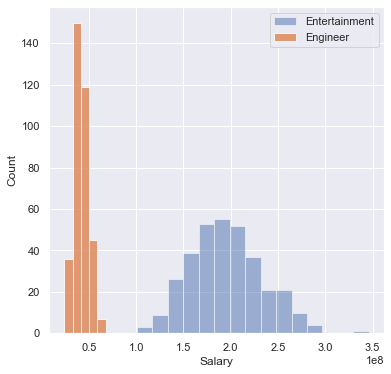

In [90]:
plt.figure(figsize=(6, 6))
plt.hist(data[data['profession'] == 'Entertainment']['salary'], bins=15, alpha=0.5, label=['Entertainment'])
plt.hist(data[data['profession'] == 'Engineer']['salary'], bins=5, alpha=0.8, label=['Engineer'])

plt.xlabel('Salary')
plt.ylabel('Count')
plt.legend()
plt.grid(True)

plt.show()

* Правда ли, что те, у кого больше трех детей зарабатывают в среднем больше, чем те, у кого меньше или трое детей?

In [32]:
# H0 – зарплата выше у кого больше трёх детей
# H1 – зарплата выше у кого меньше или трое детей
# Распределение не нормальное, переменные независимые, берём U-критерий Манна-Уитни

t_value, p_value = stats.mannwhitneyu(data[data['children'] > 3]['salary'],
                                      data[data['children'] <= 3]['salary'], alternative='less')

alpha = 0.05
if p_value > alpha:
    print('Да, гипотеза верна, зарплата выше у тех, у кого больше трёх детей')
else:
    print('Нет, гипотеза не верна, зарплата выше у тех, у кого трое или меньше детей')

Да, гипотеза верна, зарплата выше у тех, у кого больше трёх детей


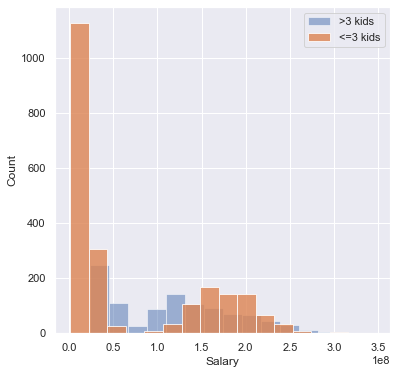

In [88]:
plt.figure(figsize=(6, 6))
plt.hist(data[data['children'] > 3]['salary'], bins=15, alpha=0.5, label=['>3 kids'])
plt.hist(data[data['children'] <= 3]['salary'], bins=15, alpha=0.8, label=['<=3 kids'])

plt.xlabel('Salary')
plt.ylabel('Count')

plt.legend()
plt.grid(True)

plt.show()

* Правда ли, что дома художники (Artist) живут в домах, которые в среднем дороже или дешевле, чем дома адвокатов (Lawyer)?

In [34]:
# H0 – средняя стоимость домов художников <> стоимости домов адвокатов
# H1 – средняя стоимость домов художников = стоимости домов адвокатов
# Распределение нормальное, берём t-тест Стьюдента

t_value, p_value = stats.ttest_ind(data[data['profession'] == 'Artist']['home_cost'],
                                   data[data['profession'] == 'Lawyer']['home_cost'])

alpha = 0.05
if p_value > alpha:
    print('Да, гипотеза верна, средняя стоимость домов художников и адвокатов отличается')
else:
    print('Нет, гипотеза не верна, средняя стоимость домов художников и адвокатов одинаковая')

Нет, гипотеза не верна, средняя стоимость домов художников и адвокатов одинаковая


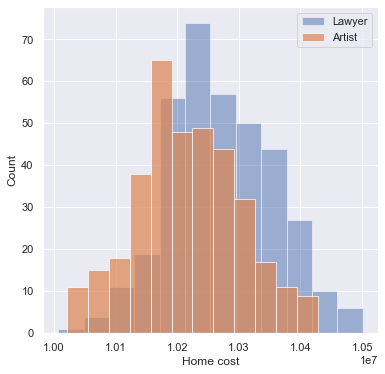

In [93]:
plt.figure(figsize=(6, 6))
plt.hist(data[data['profession'] == 'Lawyer']['home_cost'], bins=12, alpha=0.5, label=['Lawyer'])
plt.hist(data[data['profession'] == 'Artist']['home_cost'], bins=12, alpha=0.7, label=['Artist'])

plt.xlabel('Home cost')
plt.ylabel('Count')
plt.legend()
plt.grid(True)

plt.show()

* Правда ли, что недвижимость у тех, кто когда либо был в браке в среднем дороже, чем у тех, кто никогда не был в браке?


In [84]:
# H0 – недвижимость дороже у тех, кто когда-либо был в браке
# H1 – недвижимость дороже у тех, кто никогда не был в браке
# Распределение нормальное, берём t-тест Стьюдента

t_value, p_value = stats.ttest_ind(data[data['was_married'] == 0]['home_cost'],
                                   data[data['was_married'] == 1]['home_cost'], alternative='less')

alpha = 0.05
if p_value > alpha:
    print('Да, гипотеза верна, недвижимость дороже у тех, кто когда-либо был в браке')
else:
    print('Нет, гипотеза не верна, недвижимость дороже у тех, кто никогда не был в браке')


Да, гипотеза верна, недвижимость дороже у тех, кто когда-либо был в браке


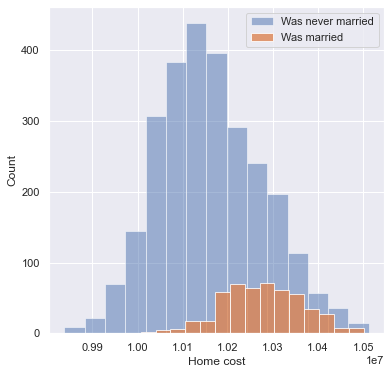

In [86]:
plt.figure(figsize=(6, 6))
plt.hist(data[data['was_married'] == 1]['home_cost'], bins=15, alpha=0.5, label=['Was never married'])
plt.hist(data[data['was_married'] == 0]['home_cost'], bins=15, alpha=0.8, label=['Was married'])

plt.xlabel('Home cost')
plt.ylabel('Count')

plt.legend()
plt.grid(True)

plt.show()

* Правда ли, что мужчины в среднем чаще бывают в браке, чем женщины?

**Подсказка** - Составьте матрицу смежности и воспользуйтесь критерием хи-квадрат из библиотеки scipy

In [115]:
# H0 – мужчины бывают в браке чаще женщин
# H1 – женщины бывают в браке чаще мужчин

data['was_not_married'] = np.where(data['was_married'] == 0, 0, 1)
marriage = data.groupby('sex', as_index=True).agg({'was_married': 'sum', 'was_not_married': 'sum'})
t_value, p_value, _, _ = chi2_contingency(marriage)

marriage

,was_married,was_not_married
sex,,
0.0,778.0,778
1.0,1941.0,1941


In [116]:
alpha = 0.05
if p_value > alpha:
    print('Да, гипотеза верна, мужчины бывают в браке чаще женщин')
else:
    print('Нет, гипотеза не верна, женщины бывают в браке чаще мужчин')

Да, гипотеза верна, мужчины бывают в браке чаще женщин


Правда ли, что женщины с зарплатой выше медианной в среднем более счастливые, чем мужчины с зарплатой, которая выше средней?

In [95]:
women_median = data[data['sex'] == 0]['salary'].median()
men_mean = data[data['sex'] == 1]['salary'].mean()

In [112]:
# H0 – женщины с зарплатой выше медианной в среднем более счастливее, чем мужчины с зарплатой выше средней
# H1 – женщины с зарплатой выше медианной в среднем менее счастливые, чем мужчины с зарплатой выше средней
# Распределение не нормальное, переменные независимые, берём U-критерий Манна-Уитни

t_value, p_value = stats.mannwhitneyu(data[(data['salary'] > women_median) & (data['sex'] == 0)]['happyness'],
                                      data[(data['salary'] > men_mean) & (data['sex'] == 1)]['happyness'],
                                      alternative='less')
alpha = 0.05
if p_value > alpha:
    print('Да, гипотеза верна, женщины с зарплатой выше медианной в среднем более счастливее, чем мужчины с зарплатой выше средней')
else:
    print('Нет, гипотеза не верна, женщины с зарплатой выше медианной в среднем менее счастливые, чем мужчины с зарплатой выше средней')

Нет, гипотеза не верна, женщины с зарплатой выше медианной в среднем менее счастливые, чем мужчины с зарплатой выше средней
